### 0. Load

In [2]:
import pandas as pd
import os
os.listdir()

['.DS_Store',
 'Untitled.ipynb',
 'car.data',
 '.ipynb_checkpoints',
 'car.names',
 'car.c45-names']

In [5]:
! cat car.names

1. Title: Car Evaluation Database

2. Sources:
   (a) Creator: Marko Bohanec
   (b) Donors: Marko Bohanec   (marko.bohanec@ijs.si)
               Blaz Zupan      (blaz.zupan@ijs.si)
   (c) Date: June, 1997

3. Past Usage:

   The hierarchical decision model, from which this dataset is
   derived, was first presented in 

   M. Bohanec and V. Rajkovic: Knowledge acquisition and explanation for
   multi-attribute decision making. In 8th Intl Workshop on Expert
   Systems and their Applications, Avignon, France. pages 59-78, 1988.

   Within machine-learning, this dataset was used for the evaluation
   of HINT (Hierarchy INduction Tool), which was proved to be able to
   completely reconstruct the original hierarchical model. This,
   together with a comparison with C4.5, is presented in

   B. Zupan, M. Bohanec, I. Bratko, J. Demsar: Machine learning by
   function decomposition. ICML-97, Nashville, TN. 1997 (to appear)

4. Relevant Information Paragraph:

   Car Evaluation Database was 

In [6]:
! cat car.c45-names

| names file (C4.5 format) for car evaluation domain

| class values

unacc, acc, good, vgood

| attributes

buying:   vhigh, high, med, low.
maint:    vhigh, high, med, low.
doors:    2, 3, 4, 5more.
persons:  2, 4, more.
lug_boot: small, med, big.
safety:   low, med, high.


In [17]:
cols = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df = pd.read_csv('car.data', names=cols, header=None)
df.head

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


### 1. EDA

In [22]:
for col in cols:
    print(df[col].value_counts())

vhigh    432
high     432
med      432
low      432
Name: buying, dtype: int64
vhigh    432
high     432
med      432
low      432
Name: maint, dtype: int64
2        432
3        432
4        432
5more    432
Name: doors, dtype: int64
2       576
4       576
more    576
Name: persons, dtype: int64
small    576
med      576
big      576
Name: lug_boot, dtype: int64
low     576
med     576
high    576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


In [38]:
# Convert categories which makes domain sense to numerical cols

# Convert doors to numerical value starting from 1
df['doors'] = df['doors'].replace({
    '2':1,
    '3':2,
    '4':3,
    '5more':4
})

# Convert person to numercial value starting from 1
df['persons'] = df['persons'].replace({
    '2':1,
    '4':2,
    'more':3
})

df['doors'] = df['doors'].astype(int)
df['persons'] = df['persons'].astype(int)
df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,1,small,low,unacc
1,vhigh,vhigh,2,1,small,med,unacc
2,vhigh,vhigh,2,1,small,high,unacc
3,vhigh,vhigh,2,1,med,low,unacc
4,vhigh,vhigh,2,1,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5,3,med,med,good
1724,low,low,5,3,med,high,vgood
1725,low,low,5,3,big,low,unacc
1726,low,low,5,3,big,med,good


In [24]:
df.isnull().sum() # check for null

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

### 2. Preprocessing

In [39]:
from sklearn.model_selection import train_test_split

In [144]:
target = 'buying'
X = df.drop(target, axis=1)
y = df[target]

In [145]:
# TTS
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2022)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(1209, 6) (519, 6)
(1209,) (519,)


In [129]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [130]:
ohe = OneHotEncoder()
ohe.fit(X_train)
X_train_enc = ohe.transform(X_train)
X_test_enc = ohe.transform(X_test)

In [143]:
X_train_enc

<1209x21 sparse matrix of type '<class 'numpy.float64'>'
	with 7254 stored elements in Compressed Sparse Row format>

In [131]:
le = LabelEncoder()
le.fit(y_train)
y_train_enc = le.transform(y_train)
y_test_enc = le.transform(y_test)

### 3. Modelling

In [53]:
import xgboost as xgb

In [137]:
clf = xgb.XGBClassifier(tree_method="approx", enable_categorical=True,
                         booster='gbtree',
                         learning_rate=0.1,
                         n_estimators=500,
                         seed=20221127)
clf.fit(X_train_enc, y_train_enc)
clf.save_model("car-model.json")

In [138]:
# xgb.plot_importance(clf)
# plt.figure(figsize = (16, 12))
# plt.show()

/Users/tonyngmk/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


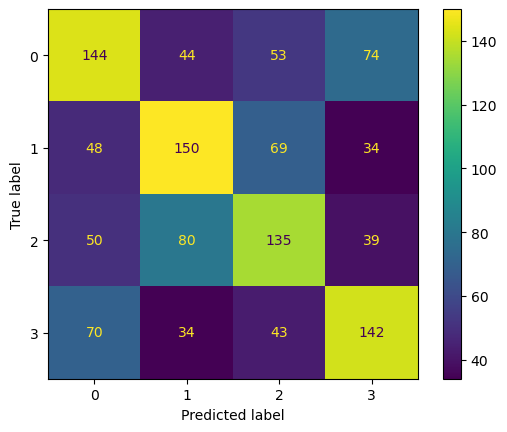

In [139]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X_train_enc, y_train_enc) # train-set

/Users/tonyngmk/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


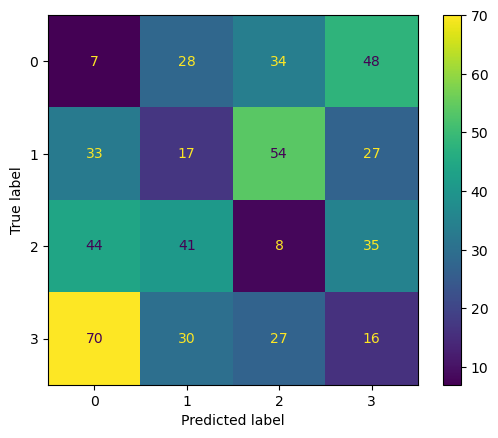

In [140]:
plot_confusion_matrix(clf, X_test_enc, y_test_enc)
plt.show()

In [141]:
from sklearn.metrics import accuracy_score

y_hat = clf.predict(X_test_enc)
acc = accuracy_score(y_test_enc, y_hat)
print(f'Accuracy: {acc*100:.2f}%')

Accuracy: 9.25%


In [158]:
from sklearn.tree import DecisionTreeClassifier

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)
clf_en.fit(X_train_enc, y_train_enc)

y_hat_en = clf_en.predict(X_test_enc)
accuracy_score(y_test_enc, y_hat_en)

0.2832369942196532

In [160]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0)
clf_gini.fit(X_train_enc, y_train_enc)

y_hat_gini = clf_gini.predict(X_test_enc)
accuracy_score(y_test_enc, y_hat_gini)

0.2832369942196532

In [124]:
# # import XGBoost
# import xgboost as xgb

# ohe = OneHotEncoder()
# ohe.fit(X)
# X_enc = ohe.transform(X)

# le = LabelEncoder()
# le.fit(y)
# y_enc = le.transform(y)

# dmatrix = xgb.DMatrix(data=X_enc,label=y_enc)

In [123]:
# dmatrix.get_data()

In [121]:
# from xgboost import cv

# params = {'colsample_bytree': 0.3,'learning_rate': 0.1, 'max_depth': 5, 'alpha': 10}
# xgb_cv = cv(dtrain=dmatrix, params=params, nfold=3, num_boost_round=50, early_stopping_rounds=10, metrics="auc", as_pandas=True, seed=123)

In [122]:
# xgb_cv

### Question:

Given x of :
- Maintenance = High
- Number of doors = 4
- Lug Boot Size = Big
- Safety = High
- Class Value = Good

buying:   vhigh, high, med, low.
maint:    vhigh, high, med, low.
doors:    2, 3, 4, 5more.
persons:  2, 4, more.
lug_boot: small, med, big.
safety:   low, med, high.

In [170]:
df_qns = pd.DataFrame(['high', 3, 'big', 'high', 'good', 1]).T
df_qns.columns = ['maint', 'doors', 'lug_boot', 'safety', 'class', 'persons']
df_qns = df_qns[['maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']]
df_qns

,maint,doors,persons,lug_boot,safety,class
0,high,3,1,big,high,good


In [176]:
df_qns_enc = ohe.transform(df_qns)
ans = clf_gini.predict(df_qns_enc)
ans

array([1])

In [184]:
le.inverse_transform(ans)[0]

'low'